# Hands-on session with pke

Example of graph-based keyphrase extraction using `pke` / TopicRank

## Requirements

pip install `pke` from Github:

```
pip install git+https://github.com/boudinfl/pke.git
```

install additional/external resources:

```
python -m nltk.downloader stopwords
python -m nltk.downloader universal_tagset
python -m spacy download en_core_web_sm # download the english model
```

pip install `matplotlib` for visualizing graphs in the notebook
```
pip install matplotlib
```

### Let's start by importing `pke` and initializing a TopicRank model

In [105]:
import pke

# initialize a TopicRank keyphrase extraction model
extractor = pke.unsupervised.TopicRank()

### What we need now is a sample text document

In [106]:
# sample document (2040.abstr from the Hulth-2003 dataset)
sample = """Inverse problems for a mathematical model of ion exchange in a compressible ion exchanger.
A mathematical model of ion exchange is considered, allowing for ion exchanger compression in the process
of ion exchange. Two inverse problems areinvestigated for this model, unique solvability is proved, and
numerical solution methods are proposed. The efficiency of the proposed methods is demonstrated by a
numerical experiment."""

# normalize spacing
sample = sample.replace("\n", " ")

### Then we can load the sample document using the extractor

In [107]:
# load the document
# text preprocessing is carried out using spacy
extractor.load_document(input=sample, language='en')


# let's have a look at it
for i, sentence in enumerate(extractor.sentences):
    print("sentence {}:".format(i))
    print(" - words: {} ...".format(' '.join(sentence.words[:5])))
    print(" - stems: {} ...".format(' '.join(sentence.stems[:5])))
    print(" - PoS: {} ...".format(' '.join(sentence.pos[:5])))

print()


sentence 0:
 - words: Inverse problems for a mathematical ...
 - stems: invers problem for a mathemat ...
 - PoS: NOUN NOUN ADP DET ADJ ...
sentence 1:
 - words: A mathematical model of ion ...
 - stems: a mathemat model of ion ...
 - PoS: DET ADJ NOUN ADP NOUN ...
sentence 2:
 - words: Two inverse problems areinvestigated for ...
 - stems: two invers problem areinvestig for ...
 - PoS: NUM NOUN NOUN VERB ADP ...
sentence 3:
 - words: The efficiency of the proposed ...
 - stems: the effici of the propos ...
 - PoS: DET NOUN ADP DET VERB ...



### Now is the time to identify the keyphrase candidates

In [108]:
# identify the keyphrase candidates using TopicRank's default strategy
# i.e. the longest sequences of nouns and adjectives `(Noun|Adj)*`
extractor.candidate_selection()

# let's have a look at it
for i, candidate in enumerate(extractor.candidates):
    # the candidate is in stemmed form, we can find the (first occurring)
    # surface form using the candidates dictionary structure
    surface_form = ' '.join(extractor.candidates[candidate].surface_forms[0])
    print("candidate {}: {}; {}".format(i, candidate, surface_form))



candidate 0: invers problem; Inverse problems
candidate 1: mathemat model; mathematical model
candidate 2: ion exchang; ion exchange
candidate 3: compress ion exchang; compressible ion exchanger
candidate 4: ion exchang compress; ion exchanger compression
candidate 5: process; process
candidate 6: model; model
candidate 7: uniqu solvabl; unique solvability
candidate 8: numer solut method; numerical solution methods
candidate 9: effici; efficiency
candidate 10: method; methods
candidate 11: numer experi; numerical experiment


### Now is the time to weight/rank the keyphrase candidates

In [109]:
# candidate weighting, in the case of TopicRank, does candidate clustering, graph construction and compute
# a random walk algorithm to rank nodes (topics)
extractor.candidate_weighting()

In [118]:
# let's have a look at the topics
for i, topic in enumerate(extractor.topics):
    print("topic {}: {} ".format(i, ';'.join(topic)))

topic 0: method;numer solut method 
topic 1: numer experi 
topic 2: mathemat model;model 
topic 3: compress ion exchang;ion exchang;ion exchang compress 
topic 4: effici 
topic 5: invers problem 
topic 6: process 
topic 7: uniqu solvabl 


{0: 'method;numer solut method', 1: 'numer experi', 2: 'mathemat model;model', 3: 'compress ion exchang;ion exchang;ion exchang compress', 4: 'effici', 5: 'invers problem', 6: 'process', 7: 'uniqu solvabl'}


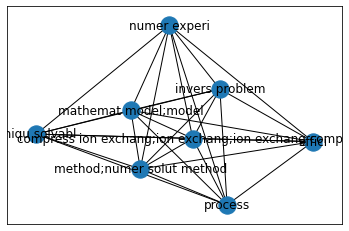

In [119]:
# let have a look at the graph
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

labels = {i: ';'.join(topic) for i, topic in enumerate(extractor.topics)}
print(labels)

nx.draw_networkx(extractor.graph, with_labels=True, labels=labels)

In [122]:
# let's have a look at the weights/ranks
# In TopicRank, weights are computed for each topic, and only one
# candidate per topic (here the first occurring one) is kept
for candidate, weight in extractor.weights.items():
    print('{}: {}'.format(candidate, weight))


numer solut method: 0.11176908254856226
numer experi: 0.05343470636992753
mathemat model: 0.2099058556993993
ion exchang: 0.25123152462546205
effici: 0.06926399358923595
invers problem: 0.1259964215178055
process: 0.09128212732650305
uniqu solvabl: 0.08711628832310421


### Now is the time to get the N-best candidates

In [126]:
# N-best (here, 5) selection
keyphrases = extractor.get_n_best(n=5, stemming=False)

for i, (candidate, score) in enumerate(keyphrases):
    print("rank {}: {} ({})".format(i, candidate, score))

rank 0: ion exchange (0.25123152462546205)
rank 1: mathematical model (0.2099058556993993)
rank 2: inverse problems (0.1259964215178055)
rank 3: numerical solution methods (0.11176908254856226)
rank 4: process (0.09128212732650305)
